In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# List all files and folders in the input directory (Kaggle datasets are usually stored here)
input_dir = '/kaggle/input'
print("\nAvailable folders in /kaggle/input:")
print(os.listdir(input_dir))

# Loop through each dataset folder to display file paths
for folder in os.listdir(input_dir):
    folder_path = os.path.join(input_dir, folder)
    if os.path.isdir(folder_path):
        print(f"\n📁 Files inside: {folder}")
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            print(file_path)


Current Working Directory: /kaggle/working

Available folders in /kaggle/input:
['rice-leaf-disease-dataset-04', 'leaf2-leaf', 'non-rice-leaf-others', 'rice-disease-datset-02', 'rice-disease-dataset-original', 'paper-img', 'rice-leaf-disease-dataset-03', 'rice-leaf-dataset-01']

📁 Files inside: rice-leaf-disease-dataset-04
/kaggle/input/rice-leaf-disease-dataset-04/Leaf scald
/kaggle/input/rice-leaf-disease-dataset-04/leaf___blast
/kaggle/input/rice-leaf-disease-dataset-04/Sheath Blight
/kaggle/input/rice-leaf-disease-dataset-04/leaf__scald
/kaggle/input/rice-leaf-disease-dataset-04/Leaf Blast
/kaggle/input/rice-leaf-disease-dataset-04/Rice Hispa
/kaggle/input/rice-leaf-disease-dataset-04/leaf_scald
/kaggle/input/rice-leaf-disease-dataset-04/leaf_blast
/kaggle/input/rice-leaf-disease-dataset-04/Sheath _Blight

📁 Files inside: leaf2-leaf
/kaggle/input/leaf2-leaf/leaf2.jfif

📁 Files inside: non-rice-leaf-others
/kaggle/input/non-rice-leaf-others/non_rice_leaf_images

📁 Files inside: rice

In [8]:
import os
from pathlib import Path
from collections import defaultdict
import random

print("=" * 80)
print("RICE LEAF DISEASE DATASET MERGER")
print("=" * 80)

INPUT_BASE = Path("/kaggle/input")
OUTPUT_BASE = Path("/kaggle/working/final_rice_dataset")
OUTPUT_BASE.mkdir(exist_ok=True)

# Class name normalization
CLASS_MAPPING = {
    "Health": "healthy",
    "Healthy Rice Leaf": "healthy",
    "Brown Spot": "brown_spot",
    "Brown spot": "brown_spot",
    "Bacterial Leaf Blight": "bacterial_leaf_blight",
    "Bacterial leaf blight": "bacterial_leaf_blight",
    "Leaf Blast": "leaf_blast",
    "Leaf_Blast": "leaf_blast",
    "leaf_blast": "leaf_blast",
    "leaf___blast": "leaf_blast",
    "Leaf scald": "leaf_scald",
    "Leaf_scald": "leaf_scald",
    "leaf_scald": "leaf_scald",
    "leaf__scald": "leaf_scald",
    "Leaf smut": "leaf_smut",
    "Narrow Brown Leaf Spot": "narrow_brown_leaf_spot",
    "Neck_Blast": "neck_blast",
    "Rice Hispa": "rice_hispa",
    "Sheath Blight": "sheath_blight",
    "Sheath_Blight": "sheath_blight",
    "Sheath _Blight": "sheath_blight",
    "non_rice_leaf_images": "not_a_rice_leaf",
}

# All datasets to merge
datasets_to_merge = [
    INPUT_BASE / "rice-leaf-dataset-01" / "rice-leaf-desease",
    INPUT_BASE / "rice-disease-datset-02" / "rice_leaf_diseases",
    INPUT_BASE / "rice-disease-dataset-original" / "Original",
    INPUT_BASE / "rice-leaf-disease-dataset-03" / "Rice_Leaf_Diease",
    INPUT_BASE / "rice-leaf-disease-dataset-04",
    INPUT_BASE / "non-rice-leaf-others" / "non_rice_leaf_images",
    INPUT_BASE / "d" / "harshithan21",
]

print("\nScanning datasets...")

class_images = defaultdict(list)

for dataset_path in datasets_to_merge:
    if not dataset_path.exists():
        print(f"Skipping: {dataset_path}")
        continue
    
    print(f"Scanning: {dataset_path}")
    
    for root, dirs, files in os.walk(dataset_path):
        relative_path = Path(root).relative_to(dataset_path)
        
        if str(relative_path) == ".":
            class_name = "uncategorized"
        else:
            parts = str(relative_path).split(os.sep)
            class_name = parts[0]
        
        normalized_class = CLASS_MAPPING.get(class_name, class_name.lower().replace(" ", "_"))
        
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif', '.bmp')):
                file_path = Path(root) / file
                class_images[normalized_class].append(str(file_path))

# Summary before balancing
print("\n" + "=" * 80)
print("BEFORE BALANCING")
print("-" * 80)

total_before = sum(len(v) for v in class_images.values())
print(f"Total images: {total_before}")
print(f"Total classes: {len(class_images)}")

for class_name in sorted(class_images.keys()):
    count = len(class_images[class_name])
    print(f"  {class_name:.<50} {count:>6}")

# Balance classes
MAX_PER_CLASS = 1000
MIN_PER_CLASS = 100

print("\n" + "=" * 80)
print("BALANCING CLASSES")
print("-" * 80)

filtered_images = {}
removed = []

for class_name, images in class_images.items():
    count = len(images)
    
    if count < MIN_PER_CLASS:
        print(f"Removing {class_name}: {count} < {MIN_PER_CLASS}")
        removed.append(class_name)
        continue
    
    if count > MAX_PER_CLASS:
        selected = random.sample(images, MAX_PER_CLASS)
        filtered_images[class_name] = selected
        print(f"Reducing {class_name}: {count} -> {MAX_PER_CLASS}")
    else:
        filtered_images[class_name] = images
        print(f"Keeping {class_name}: {count}")

# Create symbolic links
print("\n" + "=" * 80)
print("CREATING CONSOLIDATED DATASET")
print("-" * 80)

total_linked = 0

for class_name, images in filtered_images.items():
    class_dir = OUTPUT_BASE / class_name
    class_dir.mkdir(exist_ok=True)
    
    for idx, image_path in enumerate(images):
        try:
            src = Path(image_path)
            dst_name = f"{class_name}_{idx:06d}{src.suffix}"
            dst = class_dir / dst_name
            
            if not dst.exists():
                os.symlink(src, dst)
                total_linked += 1
        except Exception as e:
            pass
    
    print(f"Linked {len(images)} images -> {class_name}")

# Final summary
print("\n" + "=" * 80)
print("CONSOLIDATION COMPLETE")
print("=" * 80)

final_summary = {}
for class_dir in OUTPUT_BASE.iterdir():
    if class_dir.is_dir():
        count = len(list(class_dir.glob("*")))
        final_summary[class_dir.name] = count

total_final = sum(final_summary.values())

print(f"\nFinal Dataset:")
for class_name in sorted(final_summary.keys()):
    count = final_summary[class_name]
    percentage = (count / total_final) * 100
    print(f"  {class_name:.<50} {count:>6} ({percentage:>5.1f}%)")

print(f"\nTotal images: {total_final}")
print(f"Total classes: {len(final_summary)}")
print(f"Storage used: ~0 MB (symbolic links)")
print(f"Dataset path: {OUTPUT_BASE}")

if removed:
    print(f"\nRemoved classes: {removed}")

print("\n" + "=" * 80)

RICE LEAF DISEASE DATASET MERGER

Scanning datasets...
Scanning: /kaggle/input/rice-leaf-dataset-01/rice-leaf-desease
Scanning: /kaggle/input/rice-disease-datset-02/rice_leaf_diseases
Scanning: /kaggle/input/rice-disease-dataset-original/Original
Scanning: /kaggle/input/rice-leaf-disease-dataset-03/Rice_Leaf_Diease
Scanning: /kaggle/input/rice-leaf-disease-dataset-04
Scanning: /kaggle/input/non-rice-leaf-others/non_rice_leaf_images
Skipping: /kaggle/input/d/harshithan21

BEFORE BALANCING
--------------------------------------------------------------------------------
Total images: 46934
Total classes: 11
  bacterial_leaf_blight.............................   4220
  brown_spot........................................   4307
  healthy...........................................   4157
  leaf_blast........................................   1651
  leaf_scald........................................   1553
  leaf_smut.........................................   4040
  narrow_brown_leaf_spot....

RICE LEAF DISEASE DATASET - EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW

Total Images: 10,844
Total Classes: 11
Average Images per Class: 985.8

Class Distribution:
  leaf_smut...............................  1486 ( 13.7%) ██████
  brown_spot..............................  1463 ( 13.5%) ██████
  bacterial_leaf_blight...................  1287 ( 11.9%) █████
  rice_leaf_diease........................  1051 (  9.7%) ████
  healthy.................................  1000 (  9.2%) ████
  leaf_blast..............................  1000 (  9.2%) ████
  leaf_scald..............................  1000 (  9.2%) ████
  sheath_blight...........................  1000 (  9.2%) ████
  uncategorized...........................  1000 (  9.2%) ████
  rice_hispa..............................   440 (  4.1%) ██
  narrow_brown_leaf_spot..................   117 (  1.1%) 

2. CLASS BALANCE METRICS

Max samples in class: 1486
Min samples in class: 117
Imbalance Ratio: 12.70:1
Standard Deviation: 384.54
Coeffici

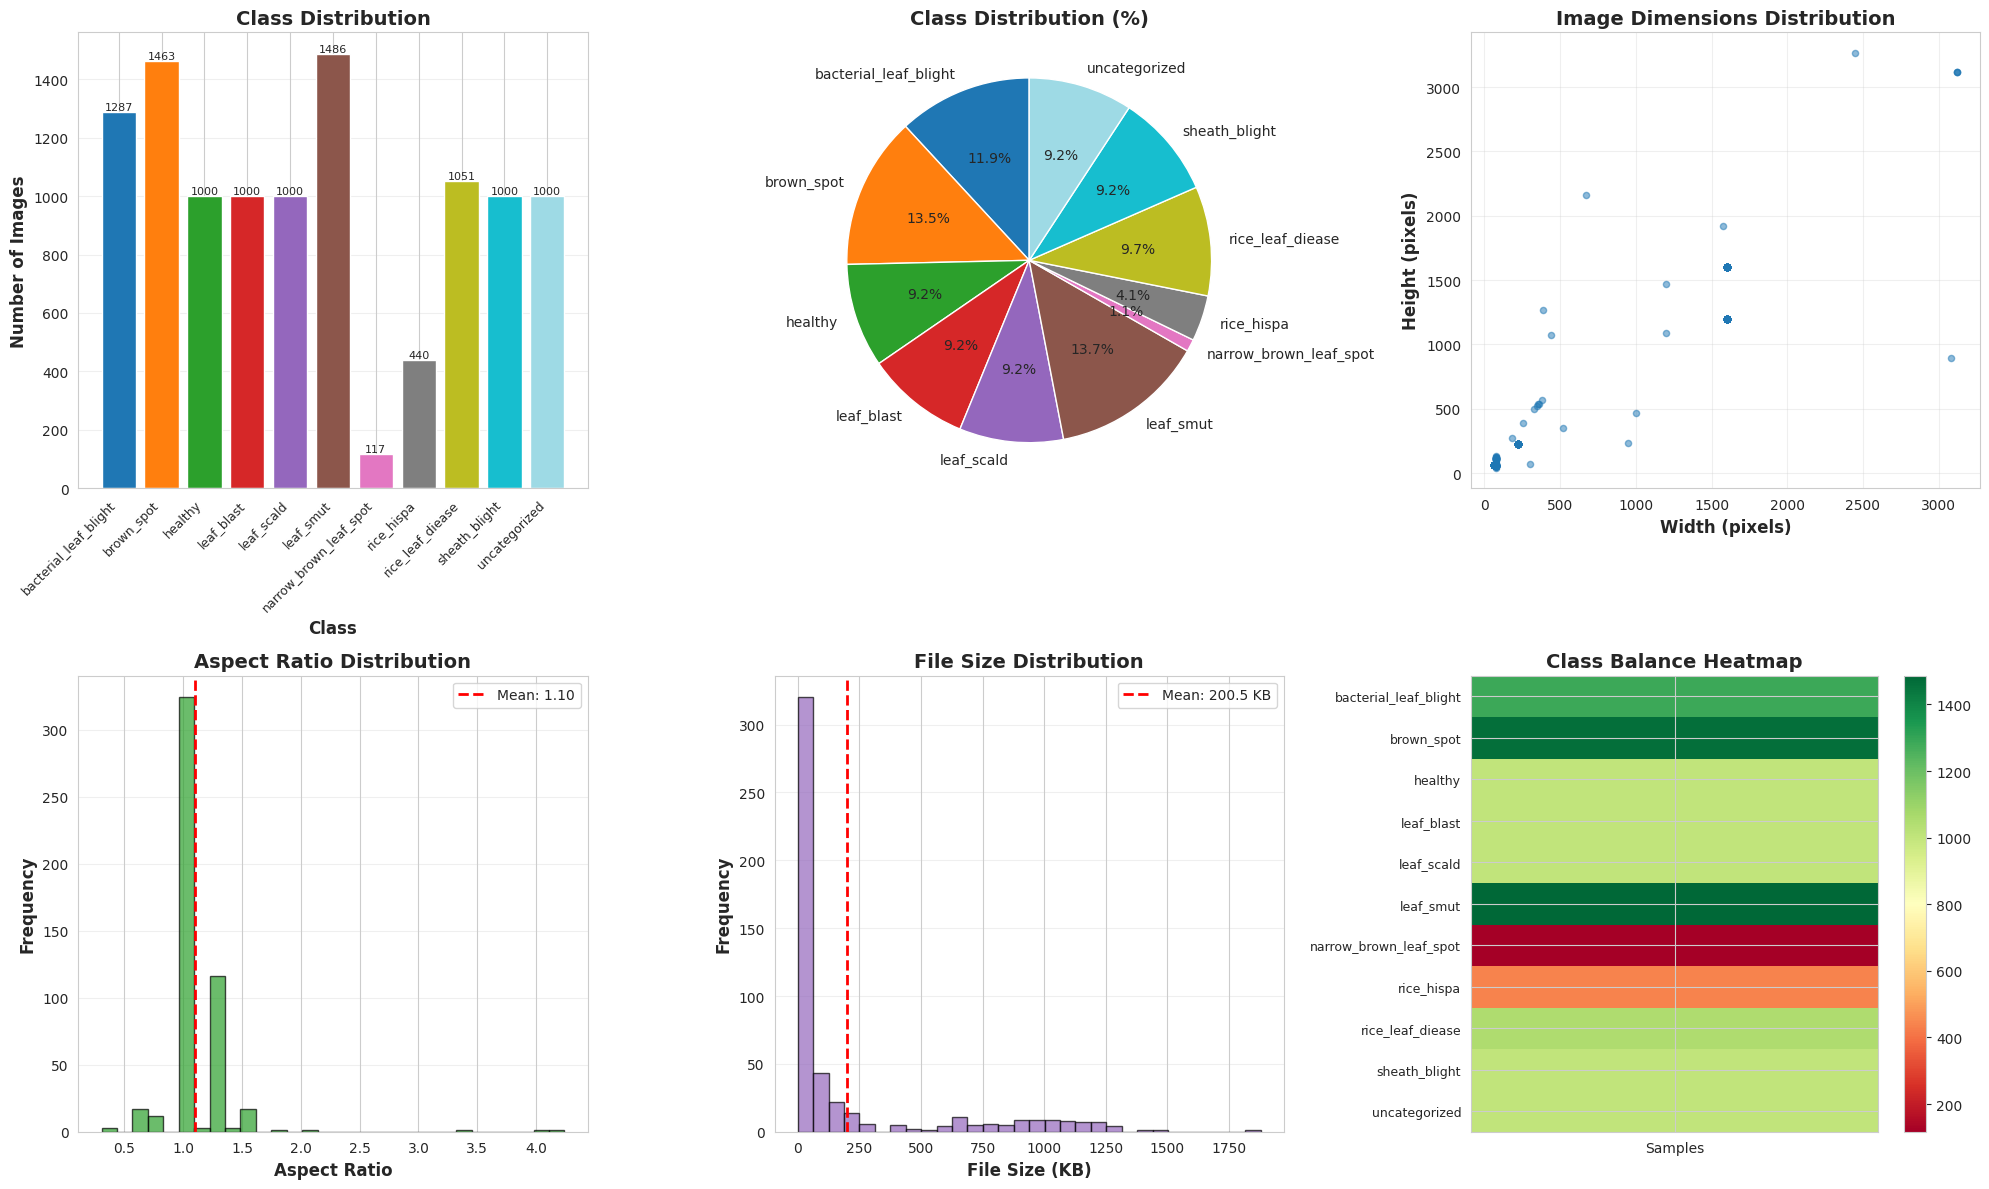


5. SAMPLE IMAGES FROM EACH CLASS

✓ Sample images saved as 'rice_sample_images.png'


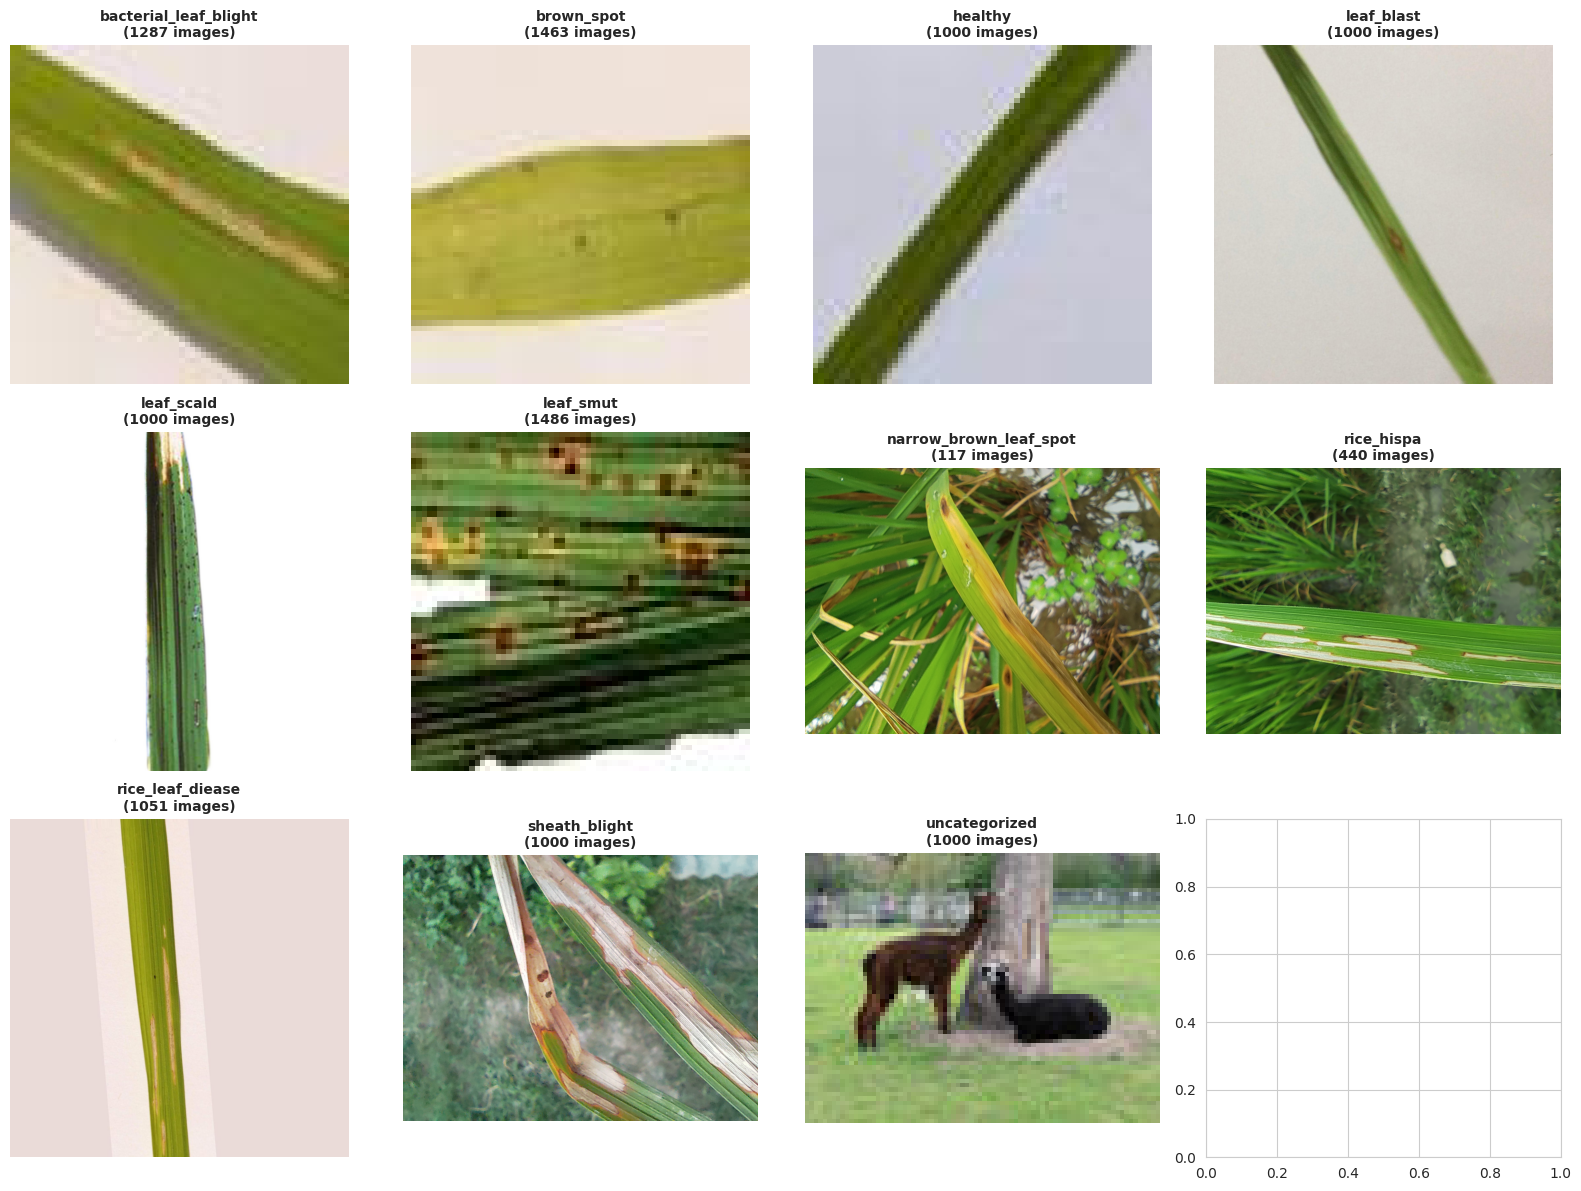


6. DATASET RECOMMENDATIONS
⚠️  CLASS IMBALANCE: Ratio is 12.70:1. Consider:
   - Data augmentation for minority classes
   - Class weights in loss function
   - SMOTE or other resampling techniques

⚠️  IMAGE SIZE VARIABILITY: Multiple dimensions detected. Consider:
   - Resizing all images to fixed dimensions (e.g., 224x224)
   - Using adaptive pooling layers

✓ SUGGESTED PREPROCESSING PIPELINE:
   1. Resize images to 224x224 or 299x299
   2. Convert all images to RGB
   3. Apply data augmentation (rotation, flip, brightness)
   4. Normalize using ImageNet mean/std
   5. Use stratified train-validation-test split (70-15-15)

EDA COMPLETE!

Generated Files:
  - rice_dataset_eda.png
  - rice_sample_images.png

Dataset is ready for preprocessing and model training!


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

print("=" * 80)
print("RICE LEAF DISEASE DATASET - EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Dataset path
DATASET_PATH = Path("/kaggle/working/final_rice_dataset")

# ============================================================================
# 1. BASIC DATASET INFORMATION
# ============================================================================
print("\n" + "=" * 80)
print("1. DATASET OVERVIEW")
print("=" * 80)

class_info = {}
all_image_paths = []

for class_dir in sorted(DATASET_PATH.iterdir()):
    if class_dir.is_dir():
        images = list(class_dir.glob("*"))
        image_files = [img for img in images if img.suffix.lower() in ['.jpg', '.jpeg', '.png', '.jfif', '.bmp']]
        class_info[class_dir.name] = len(image_files)
        all_image_paths.extend([(str(img), class_dir.name) for img in image_files])

total_images = sum(class_info.values())
num_classes = len(class_info)

print(f"\nTotal Images: {total_images:,}")
print(f"Total Classes: {num_classes}")
print(f"Average Images per Class: {total_images/num_classes:.1f}")
print(f"\nClass Distribution:")
for class_name, count in sorted(class_info.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / total_images) * 100
    bar = "█" * int(percentage / 2)
    print(f"  {class_name:.<40} {count:>5} ({percentage:>5.1f}%) {bar}")

# ============================================================================
# 2. CLASS BALANCE ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("2. CLASS BALANCE METRICS")
print("=" * 80)

counts = list(class_info.values())
max_count = max(counts)
min_count = min(counts)
imbalance_ratio = max_count / min_count

print(f"\nMax samples in class: {max_count}")
print(f"Min samples in class: {min_count}")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"Standard Deviation: {np.std(counts):.2f}")
print(f"Coefficient of Variation: {(np.std(counts)/np.mean(counts))*100:.1f}%")

# Identify minority and majority classes
minority_threshold = np.mean(counts) - np.std(counts)
majority_threshold = np.mean(counts) + np.std(counts)

minority_classes = [c for c, cnt in class_info.items() if cnt < minority_threshold]
majority_classes = [c for c, cnt in class_info.items() if cnt > majority_threshold]

if minority_classes:
    print(f"\nMinority Classes (< {minority_threshold:.0f} samples):")
    for c in minority_classes:
        print(f"  - {c}: {class_info[c]}")

if majority_classes:
    print(f"\nMajority Classes (> {majority_threshold:.0f} samples):")
    for c in majority_classes:
        print(f"  - {c}: {class_info[c]}")

# ============================================================================
# 3. IMAGE PROPERTIES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("3. IMAGE PROPERTIES ANALYSIS")
print("=" * 80)

# Sample images for analysis (to avoid loading all images)
sample_size = min(500, len(all_image_paths))
sample_indices = np.random.choice(len(all_image_paths), sample_size, replace=False)
sample_paths = [all_image_paths[i] for i in sample_indices]

print(f"\nAnalyzing {sample_size} sample images...")

image_properties = {
    'width': [],
    'height': [],
    'aspect_ratio': [],
    'file_size_kb': [],
    'format': [],
    'mode': [],
    'class': []
}

for img_path, class_name in sample_paths:
    try:
        img = Image.open(img_path)
        width, height = img.size
        
        image_properties['width'].append(width)
        image_properties['height'].append(height)
        image_properties['aspect_ratio'].append(width / height)
        image_properties['file_size_kb'].append(os.path.getsize(img_path) / 1024)
        image_properties['format'].append(img.format)
        image_properties['mode'].append(img.mode)
        image_properties['class'].append(class_name)
        
        img.close()
    except Exception as e:
        continue

df_props = pd.DataFrame(image_properties)

print("\n--- Image Dimensions ---")
print(f"Width  - Min: {df_props['width'].min()}, Max: {df_props['width'].max()}, Mean: {df_props['width'].mean():.1f}")
print(f"Height - Min: {df_props['height'].min()}, Max: {df_props['height'].max()}, Mean: {df_props['height'].mean():.1f}")
print(f"Aspect Ratio - Min: {df_props['aspect_ratio'].min():.2f}, Max: {df_props['aspect_ratio'].max():.2f}, Mean: {df_props['aspect_ratio'].mean():.2f}")

print("\n--- File Sizes ---")
print(f"Min: {df_props['file_size_kb'].min():.2f} KB")
print(f"Max: {df_props['file_size_kb'].max():.2f} KB")
print(f"Mean: {df_props['file_size_kb'].mean():.2f} KB")
print(f"Median: {df_props['file_size_kb'].median():.2f} KB")

print("\n--- Image Formats ---")
print(df_props['format'].value_counts())

print("\n--- Color Modes ---")
print(df_props['mode'].value_counts())

# Check for standardization needs
unique_sizes = df_props.groupby(['width', 'height']).size()
print(f"\n--- Size Diversity ---")
print(f"Unique size combinations: {len(unique_sizes)}")
if len(unique_sizes) > 10:
    print("⚠️  Images have varying dimensions - preprocessing required!")
else:
    print("✓ Images have consistent dimensions")

# ============================================================================
# 4. VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("4. GENERATING VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(20, 12))

# Plot 1: Class Distribution Bar Chart
ax1 = plt.subplot(2, 3, 1)
classes = list(class_info.keys())
counts = list(class_info.values())
colors = plt.cm.tab20(np.linspace(0, 1, len(classes)))
bars = ax1.bar(range(len(classes)), counts, color=colors)
ax1.set_xlabel('Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(classes)))
ax1.set_xticklabels(classes, rotation=45, ha='right', fontsize=9)
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Plot 2: Class Distribution Pie Chart
ax2 = plt.subplot(2, 3, 2)
ax2.pie(counts, labels=classes, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

# Plot 3: Image Dimensions Distribution
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(df_props['width'], df_props['height'], alpha=0.5, c=colors[0], s=20)
ax3.set_xlabel('Width (pixels)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Height (pixels)', fontsize=12, fontweight='bold')
ax3.set_title('Image Dimensions Distribution', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Aspect Ratio Distribution
ax4 = plt.subplot(2, 3, 4)
ax4.hist(df_props['aspect_ratio'], bins=30, color=colors[2], edgecolor='black', alpha=0.7)
ax4.set_xlabel('Aspect Ratio', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Aspect Ratio Distribution', fontsize=14, fontweight='bold')
ax4.axvline(df_props['aspect_ratio'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_props["aspect_ratio"].mean():.2f}')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Plot 5: File Size Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(df_props['file_size_kb'], bins=30, color=colors[4], edgecolor='black', alpha=0.7)
ax5.set_xlabel('File Size (KB)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax5.set_title('File Size Distribution', fontsize=14, fontweight='bold')
ax5.axvline(df_props['file_size_kb'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_props["file_size_kb"].mean():.1f} KB')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# Plot 6: Class Balance Heatmap
ax6 = plt.subplot(2, 3, 6)
balance_data = np.array(counts).reshape(-1, 1)
im = ax6.imshow(balance_data, cmap='RdYlGn', aspect='auto')
ax6.set_yticks(range(len(classes)))
ax6.set_yticklabels(classes, fontsize=9)
ax6.set_xticks([0])
ax6.set_xticklabels(['Samples'])
ax6.set_title('Class Balance Heatmap', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax6)

plt.tight_layout()
plt.savefig('rice_dataset_eda.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'rice_dataset_eda.png'")
plt.show()

# ============================================================================
# 5. SAMPLE IMAGES GRID
# ============================================================================
print("\n" + "=" * 80)
print("5. SAMPLE IMAGES FROM EACH CLASS")
print("=" * 80)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, class_name in enumerate(sorted(class_info.keys())):
    if idx >= 12:
        break
    
    class_path = DATASET_PATH / class_name
    images = list(class_path.glob("*"))[:1]
    
    if images:
        try:
            img = Image.open(images[0])
            axes[idx].imshow(img)
            axes[idx].set_title(f"{class_name}\n({class_info[class_name]} images)", 
                               fontsize=10, fontweight='bold')
            axes[idx].axis('off')
            img.close()
        except Exception as e:
            axes[idx].text(0.5, 0.5, 'Error loading image', 
                          ha='center', va='center')
            axes[idx].axis('off')

plt.tight_layout()
plt.savefig('rice_sample_images.png', dpi=300, bbox_inches='tight')
print("\n✓ Sample images saved as 'rice_sample_images.png'")
plt.show()

# ============================================================================
# 6. RECOMMENDATIONS
# ============================================================================
print("\n" + "=" * 80)
print("6. DATASET RECOMMENDATIONS")
print("=" * 80)

recommendations = []

if imbalance_ratio > 2:
    recommendations.append(f"⚠️  CLASS IMBALANCE: Ratio is {imbalance_ratio:.2f}:1. Consider:")
    recommendations.append("   - Data augmentation for minority classes")
    recommendations.append("   - Class weights in loss function")
    recommendations.append("   - SMOTE or other resampling techniques")

if len(unique_sizes) > 10:
    recommendations.append("\n⚠️  IMAGE SIZE VARIABILITY: Multiple dimensions detected. Consider:")
    recommendations.append("   - Resizing all images to fixed dimensions (e.g., 224x224)")
    recommendations.append("   - Using adaptive pooling layers")

if df_props['aspect_ratio'].std() > 0.5:
    recommendations.append("\n⚠️  ASPECT RATIO VARIATION: High variability detected. Consider:")
    recommendations.append("   - Center crop to square")
    recommendations.append("   - Pad images to maintain aspect ratio")

if 'L' in df_props['mode'].values or 'RGBA' in df_props['mode'].values:
    recommendations.append("\n⚠️  COLOR MODE INCONSISTENCY: Mix of grayscale and color. Consider:")
    recommendations.append("   - Converting all images to RGB")

if total_images < 5000:
    recommendations.append("\n⚠️  SMALL DATASET: Limited samples available. Consider:")
    recommendations.append("   - Heavy data augmentation")
    recommendations.append("   - Transfer learning with pretrained models")
    recommendations.append("   - Cross-validation for robust evaluation")

recommendations.append("\n✓ SUGGESTED PREPROCESSING PIPELINE:")
recommendations.append("   1. Resize images to 224x224 or 299x299")
recommendations.append("   2. Convert all images to RGB")
recommendations.append("   3. Apply data augmentation (rotation, flip, brightness)")
recommendations.append("   4. Normalize using ImageNet mean/std")
recommendations.append("   5. Use stratified train-validation-test split (70-15-15)")

for rec in recommendations:
    print(rec)

print("\n" + "=" * 80)
print("EDA COMPLETE!")
print("=" * 80)
print("\nGenerated Files:")
print("  - rice_dataset_eda.png")
print("  - rice_sample_images.png")
print("\nDataset is ready for preprocessing and model training!")

RICE LEAF DISEASE DATASET - COMPLETE PREPROCESSING PIPELINE

Configuration:
  target_size: (224, 224)
  target_samples_per_class: 1000
  min_samples_threshold: 500
  train_ratio: 0.7
  val_ratio: 0.15
  test_ratio: 0.15
  augmentation_multiplier: 3
  random_seed: 42

STEP 1: ANALYZING CURRENT DATASET

Original Class Distribution:
  ✓ leaf_smut...............................  1486
  ✓ brown_spot..............................  1463
  ✓ bacterial_leaf_blight...................  1287
  ✓ rice_leaf_diease........................  1051
  ✓ healthy.................................  1000
  ✓ leaf_blast..............................  1000
  ✓ leaf_scald..............................  1000
  ✓ sheath_blight...........................  1000
  ✓ uncategorized...........................  1000
  ✗ rice_hispa..............................   440
  ✗ narrow_brown_leaf_spot..................   117

✓ Classes to keep: 9
✗ Classes to remove: 2
  Removing: ['narrow_brown_leaf_spot', 'rice_hispa']

STEP 2: 

  Original: 100%|██████████| 1287/1287 [00:06<00:00, 192.74it/s]


  Downsampling to 1000 images...
  ✓ Final count: 1000

Processing: brown_spot
  Current: 1463, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1463/1463 [00:07<00:00, 188.96it/s]


  Downsampling to 1000 images...
  ✓ Final count: 1000

Processing: healthy
  Current: 1000, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1000/1000 [00:04<00:00, 215.94it/s]


  ✓ Final count: 1000

Processing: leaf_blast
  Current: 1000, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1000/1000 [00:26<00:00, 37.48it/s]


  ✓ Final count: 1000

Processing: leaf_scald
  Current: 1000, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1000/1000 [00:24<00:00, 40.76it/s]


  ✓ Final count: 1000

Processing: leaf_smut
  Current: 1486, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1486/1486 [00:04<00:00, 362.34it/s]


  Downsampling to 1000 images...
  ✓ Final count: 1000

Processing: rice_leaf_diease
  Current: 1051, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1051/1051 [00:45<00:00, 23.08it/s]


  Downsampling to 1000 images...
  ✓ Final count: 1000

Processing: sheath_blight
  Current: 1000, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1000/1000 [00:23<00:00, 42.79it/s]


  ✓ Final count: 1000

Processing: uncategorized
  Current: 1000, Target: 1000
  Processing original images...


  Original: 100%|██████████| 1000/1000 [00:02<00:00, 402.97it/s]


  ✓ Final count: 1000

STEP 4: CREATING TRAIN/VALIDATION/TEST SPLITS

Splitting: bacterial_leaf_blight
  Train: 700, Val: 150, Test: 150

Splitting: brown_spot
  Train: 700, Val: 150, Test: 150

Splitting: healthy
  Train: 700, Val: 150, Test: 150

Splitting: leaf_blast
  Train: 700, Val: 150, Test: 150

Splitting: leaf_scald
  Train: 700, Val: 150, Test: 150

Splitting: leaf_smut
  Train: 700, Val: 150, Test: 150

Splitting: rice_leaf_diease
  Train: 700, Val: 150, Test: 150

Splitting: sheath_blight
  Train: 700, Val: 150, Test: 150

Splitting: uncategorized
  Train: 700, Val: 150, Test: 150

STEP 5: GENERATING STATISTICS AND REPORTS

DATASET SUMMARY

TRAIN SET:
  Total images: 7551
    bacterial_leaf_blight..............  1017 ( 13.5%)
    brown_spot.........................  1061 ( 14.1%)
    healthy............................   700 (  9.3%)
    leaf_blast.........................   700 (  9.3%)
    leaf_scald.........................   700 (  9.3%)
    leaf_smut..................

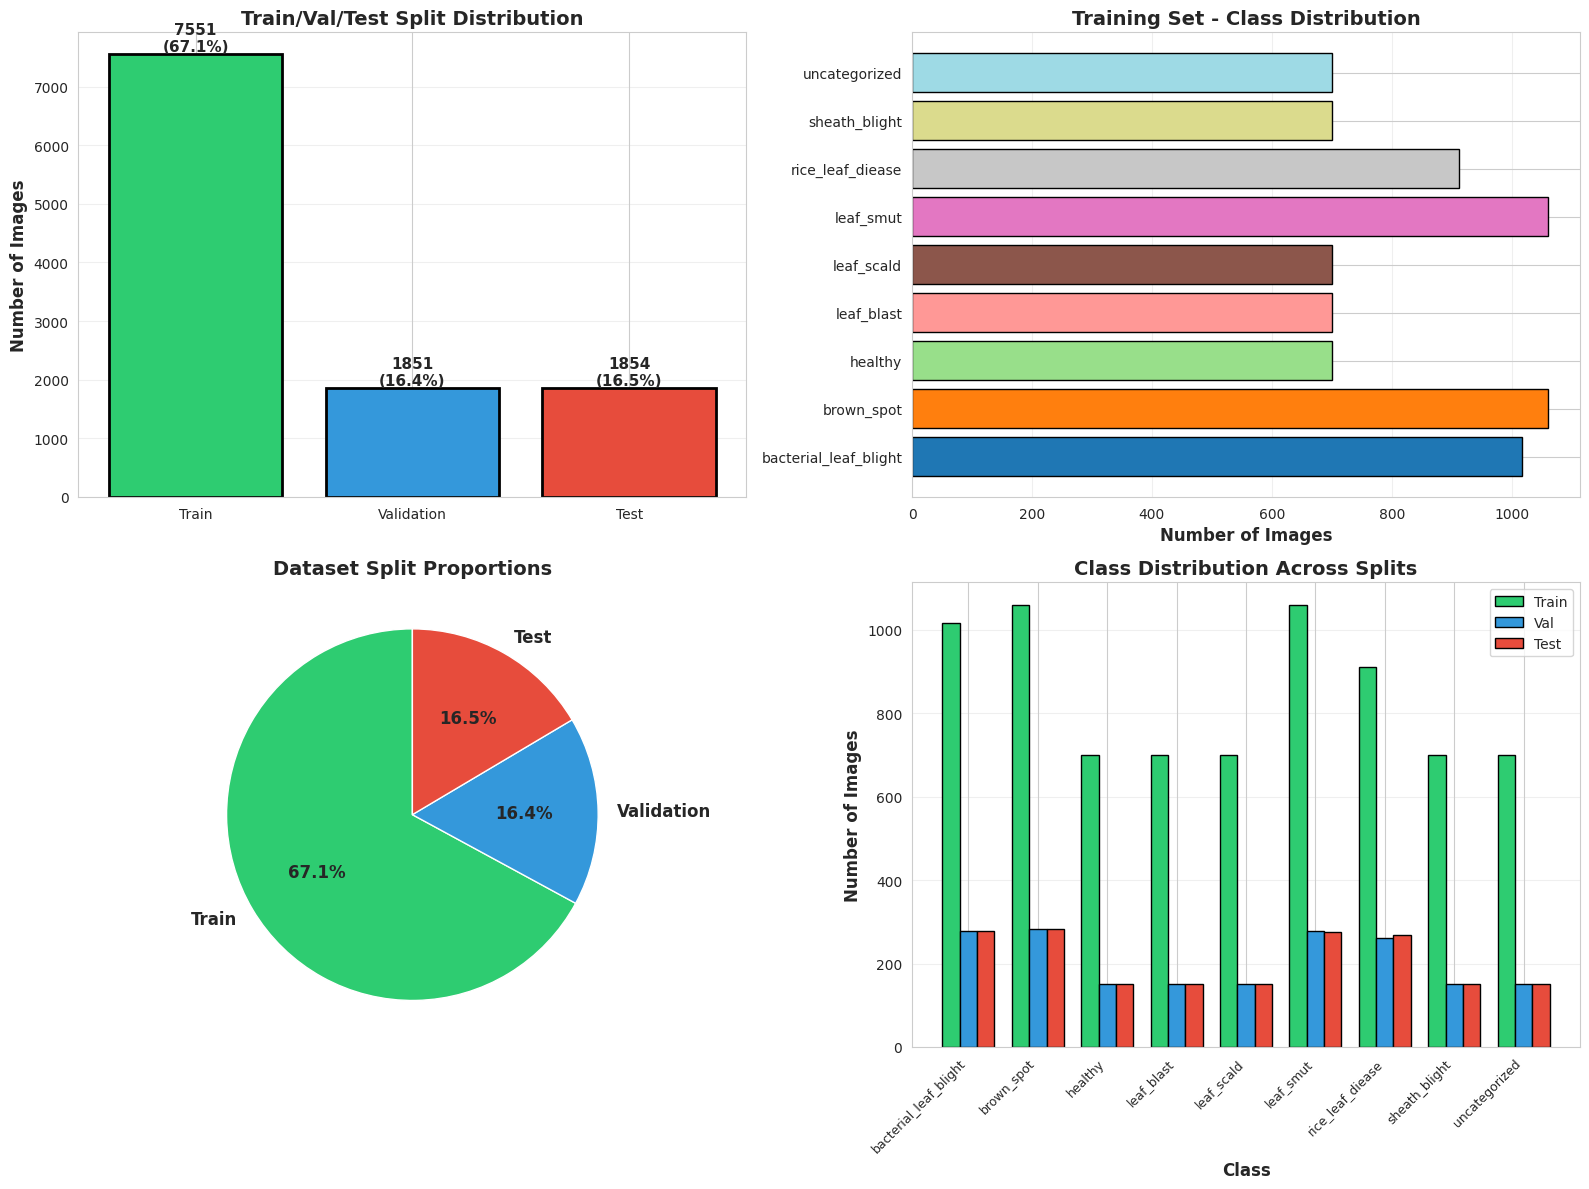


Creating sample image grid...
✓ Sample images saved: sample_preprocessed_images.png


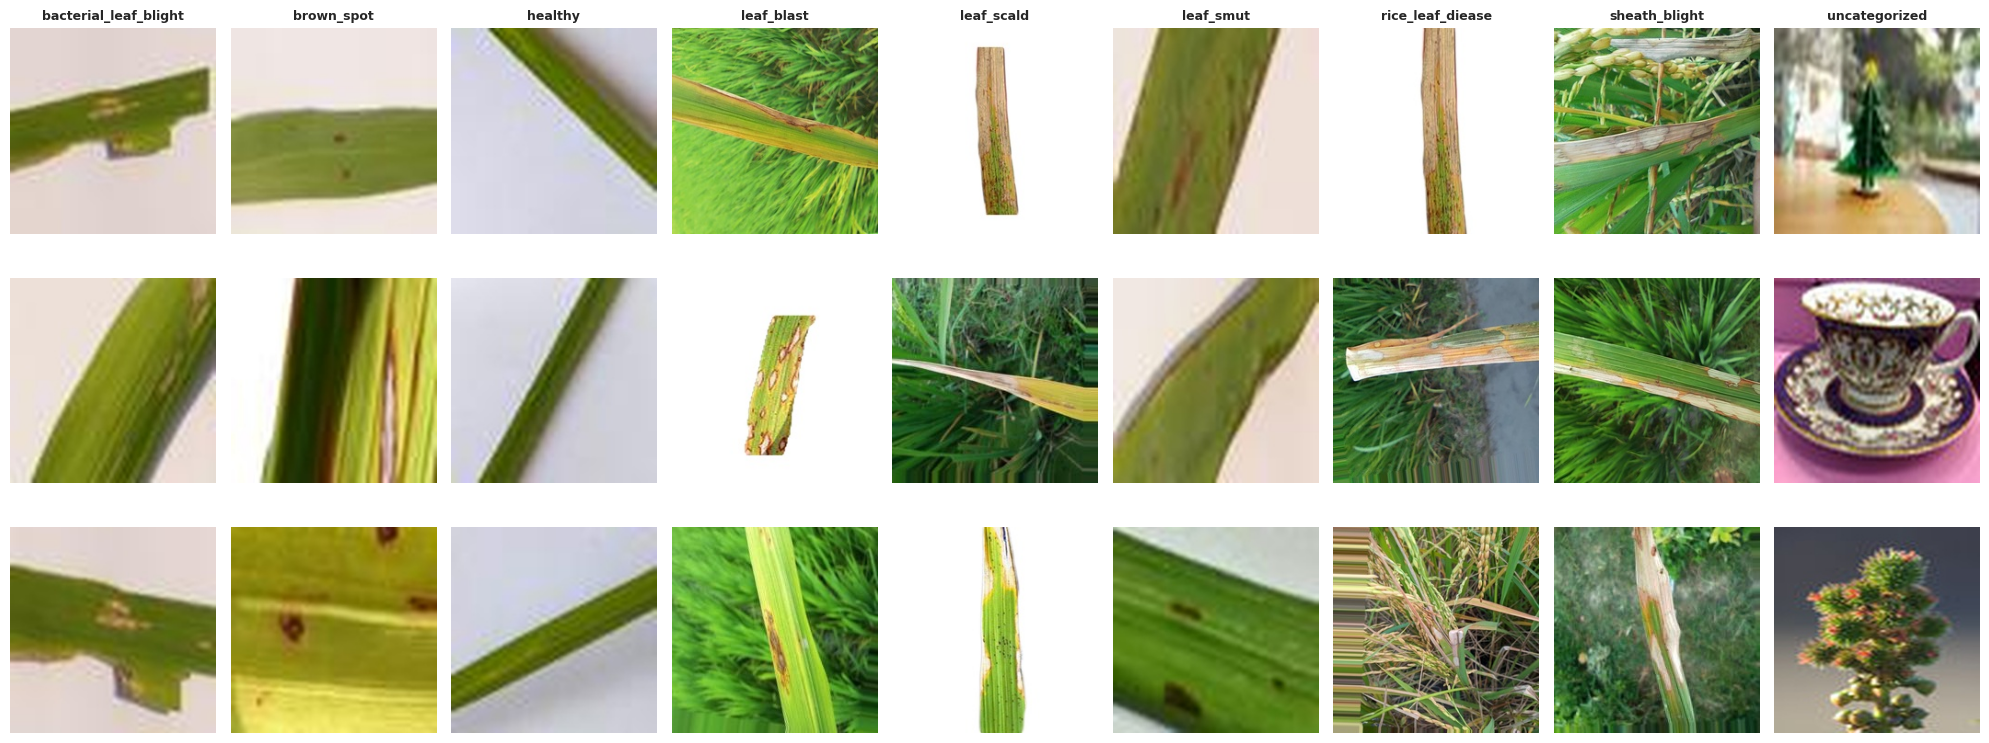


PREPROCESSING COMPLETE!

📁 OUTPUT STRUCTURE:
  /kaggle/working/preprocessed_rice_dataset/
    ├── train/
    │   ├── bacterial_leaf_blight/ (1017 images)
    │   ├── brown_spot/ (1061 images)
    │   ├── healthy/ (700 images)
    │   ├── leaf_blast/ (700 images)
    │   ├── leaf_scald/ (700 images)
    │   ├── leaf_smut/ (1061 images)
    │   ├── rice_leaf_diease/ (912 images)
    │   ├── sheath_blight/ (700 images)
    │   ├── uncategorized/ (700 images)
    ├── val/
    │   ├── bacterial_leaf_blight/ (279 images)
    │   ├── brown_spot/ (283 images)
    │   ├── healthy/ (150 images)
    │   ├── leaf_blast/ (150 images)
    │   ├── leaf_scald/ (150 images)
    │   ├── leaf_smut/ (278 images)
    │   ├── rice_leaf_diease/ (261 images)
    │   ├── sheath_blight/ (150 images)
    │   ├── uncategorized/ (150 images)
    ├── test/
    │   ├── bacterial_leaf_blight/ (277 images)
    │   ├── brown_spot/ (283 images)
    │   ├── healthy/ (150 images)
    │   ├── leaf_blast/ (150 images)
    

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageEnhance, ImageOps
import shutil
from sklearn.model_selection import train_test_split
from collections import defaultdict
import json
import random
from tqdm import tqdm

print("=" * 80)
print("RICE LEAF DISEASE DATASET - COMPLETE PREPROCESSING PIPELINE")
print("=" * 80)

# ============================================================================
# CONFIGURATION
# ============================================================================
INPUT_PATH = Path("/kaggle/working/final_rice_dataset")
OUTPUT_PATH = Path("/kaggle/working/preprocessed_rice_dataset")
OUTPUT_PATH.mkdir(exist_ok=True)

CONFIG = {
    'target_size': (224, 224),  # Standard size for CNNs
    'target_samples_per_class': 1000,  # Target balance
    'min_samples_threshold': 500,  # Remove classes below this
    'train_ratio': 0.70,
    'val_ratio': 0.15,
    'test_ratio': 0.15,
    'augmentation_multiplier': 3,  # How many augmented versions per image
    'random_seed': 42
}

random.seed(CONFIG['random_seed'])
np.random.seed(CONFIG['random_seed'])

print("\nConfiguration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")

# ============================================================================
# STEP 1: ANALYZE CURRENT DATASET
# ============================================================================
print("\n" + "=" * 80)
print("STEP 1: ANALYZING CURRENT DATASET")
print("=" * 80)

class_info = {}
for class_dir in sorted(INPUT_PATH.iterdir()):
    if class_dir.is_dir():
        images = list(class_dir.glob("*"))
        image_files = [img for img in images if img.suffix.lower() in ['.jpg', '.jpeg', '.png', '.jfif', '.bmp']]
        class_info[class_dir.name] = len(image_files)

print("\nOriginal Class Distribution:")
for class_name, count in sorted(class_info.items(), key=lambda x: x[1], reverse=True):
    status = "✓" if count >= CONFIG['min_samples_threshold'] else "✗"
    print(f"  {status} {class_name:.<40} {count:>5}")

# Identify classes to keep and remove
classes_to_keep = {k: v for k, v in class_info.items() if v >= CONFIG['min_samples_threshold']}
classes_to_remove = {k: v for k, v in class_info.items() if v < CONFIG['min_samples_threshold']}

print(f"\n✓ Classes to keep: {len(classes_to_keep)}")
print(f"✗ Classes to remove: {len(classes_to_remove)}")
if classes_to_remove:
    print(f"  Removing: {list(classes_to_remove.keys())}")

# ============================================================================
# STEP 2: DATA AUGMENTATION FUNCTIONS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 2: SETTING UP AUGMENTATION FUNCTIONS")
print("=" * 80)

def augment_image(img, seed=None):
    """Apply random augmentations to an image"""
    if seed:
        random.seed(seed)
        np.random.seed(seed)
    
    # Random rotation (-20 to 20 degrees)
    if random.random() > 0.3:
        angle = random.uniform(-20, 20)
        img = img.rotate(angle, fillcolor=(255, 255, 255))
    
    # Random horizontal flip
    if random.random() > 0.5:
        img = ImageOps.mirror(img)
    
    # Random vertical flip
    if random.random() > 0.5:
        img = ImageOps.flip(img)
    
    # Random brightness adjustment
    if random.random() > 0.3:
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.8, 1.2))
    
    # Random contrast adjustment
    if random.random() > 0.3:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(random.uniform(0.8, 1.2))
    
    # Random color/saturation adjustment
    if random.random() > 0.3:
        enhancer = ImageEnhance.Color(img)
        img = enhancer.enhance(random.uniform(0.8, 1.2))
    
    # Random sharpness adjustment
    if random.random() > 0.5:
        enhancer = ImageEnhance.Sharpness(img)
        img = enhancer.enhance(random.uniform(0.8, 1.2))
    
    return img

def preprocess_image(img_path, target_size=(224, 224)):
    """Load, convert to RGB, and resize image"""
    try:
        img = Image.open(img_path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize with high-quality resampling
        img = img.resize(target_size, Image.Resampling.LANCZOS)
        
        return img
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

print("✓ Augmentation functions ready")
print("  - Rotation (-20° to 20°)")
print("  - Horizontal/Vertical flip")
print("  - Brightness adjustment")
print("  - Contrast adjustment")
print("  - Color/Saturation adjustment")
print("  - Sharpness adjustment")

# ============================================================================
# STEP 3: PROCESS AND BALANCE DATASET
# ============================================================================
print("\n" + "=" * 80)
print("STEP 3: PROCESSING AND BALANCING DATASET")
print("=" * 80)

temp_processed = OUTPUT_PATH / "temp_balanced"
temp_processed.mkdir(exist_ok=True)

processed_counts = {}

for class_name in classes_to_keep.keys():
    print(f"\nProcessing: {class_name}")
    
    class_input_dir = INPUT_PATH / class_name
    class_output_dir = temp_processed / class_name
    class_output_dir.mkdir(exist_ok=True)
    
    # Get all images
    image_files = list(class_input_dir.glob("*"))
    image_files = [img for img in image_files if img.suffix.lower() in ['.jpg', '.jpeg', '.png', '.jfif', '.bmp']]
    
    current_count = len(image_files)
    target_count = CONFIG['target_samples_per_class']
    
    print(f"  Current: {current_count}, Target: {target_count}")
    
    processed_images = []
    
    # Process original images
    print(f"  Processing original images...")
    for idx, img_path in enumerate(tqdm(image_files, desc="  Original")):
        img = preprocess_image(img_path, CONFIG['target_size'])
        if img:
            output_path = class_output_dir / f"{class_name}_orig_{idx:05d}.jpg"
            img.save(output_path, 'JPEG', quality=95)
            processed_images.append(output_path)
            img.close()
    
    # Augment if needed
    if current_count < target_count:
        needed = target_count - current_count
        print(f"  Generating {needed} augmented images...")
        
        aug_count = 0
        while aug_count < needed:
            # Randomly select an image to augment
            source_img_path = random.choice(image_files)
            img = preprocess_image(source_img_path, CONFIG['target_size'])
            
            if img:
                # Apply augmentation
                aug_img = augment_image(img, seed=aug_count)
                output_path = class_output_dir / f"{class_name}_aug_{aug_count:05d}.jpg"
                aug_img.save(output_path, 'JPEG', quality=95)
                processed_images.append(output_path)
                
                img.close()
                aug_img.close()
                aug_count += 1
    
    # Downsample if needed
    elif current_count > target_count:
        print(f"  Downsampling to {target_count} images...")
        processed_images = random.sample(processed_images, target_count)
        # Remove excess files
        all_files = list(class_output_dir.glob("*"))
        files_to_keep = set(processed_images)
        for f in all_files:
            if f not in files_to_keep:
                f.unlink()
    
    processed_counts[class_name] = len(list(class_output_dir.glob("*")))
    print(f"  ✓ Final count: {processed_counts[class_name]}")

# ============================================================================
# STEP 4: TRAIN/VAL/TEST SPLIT
# ============================================================================
print("\n" + "=" * 80)
print("STEP 4: CREATING TRAIN/VALIDATION/TEST SPLITS")
print("=" * 80)

splits = {
    'train': OUTPUT_PATH / 'train',
    'val': OUTPUT_PATH / 'val',
    'test': OUTPUT_PATH / 'test'
}

for split_dir in splits.values():
    split_dir.mkdir(exist_ok=True)

split_info = defaultdict(lambda: defaultdict(int))

for class_name in processed_counts.keys():
    print(f"\nSplitting: {class_name}")
    
    # Get all processed images
    class_dir = temp_processed / class_name
    all_images = list(class_dir.glob("*"))
    
    # Stratified split
    train_imgs, temp_imgs = train_test_split(
        all_images, 
        test_size=(CONFIG['val_ratio'] + CONFIG['test_ratio']),
        random_state=CONFIG['random_seed']
    )
    
    val_imgs, test_imgs = train_test_split(
        temp_imgs,
        test_size=(CONFIG['test_ratio'] / (CONFIG['val_ratio'] + CONFIG['test_ratio'])),
        random_state=CONFIG['random_seed']
    )
    
    # Copy to respective directories
    for split_name, images in [('train', train_imgs), ('val', val_imgs), ('test', test_imgs)]:
        split_class_dir = splits[split_name] / class_name
        split_class_dir.mkdir(exist_ok=True)
        
        for img_path in images:
            shutil.copy2(img_path, split_class_dir / img_path.name)
        
        split_info[split_name][class_name] = len(images)
    
    print(f"  Train: {len(train_imgs)}, Val: {len(val_imgs)}, Test: {len(test_imgs)}")

# Clean up temp directory
shutil.rmtree(temp_processed)

# ============================================================================
# STEP 5: GENERATE STATISTICS AND VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 5: GENERATING STATISTICS AND REPORTS")
print("=" * 80)

# Calculate statistics
stats = {
    'train': {'total': 0, 'classes': {}},
    'val': {'total': 0, 'classes': {}},
    'test': {'total': 0, 'classes': {}}
}

for split_name, split_dir in splits.items():
    for class_dir in split_dir.iterdir():
        if class_dir.is_dir():
            count = len(list(class_dir.glob("*")))
            stats[split_name]['classes'][class_dir.name] = count
            stats[split_name]['total'] += count

# Print summary
print("\n" + "=" * 80)
print("DATASET SUMMARY")
print("=" * 80)

for split_name in ['train', 'val', 'test']:
    print(f"\n{split_name.upper()} SET:")
    print(f"  Total images: {stats[split_name]['total']}")
    for class_name, count in sorted(stats[split_name]['classes'].items()):
        percentage = (count / stats[split_name]['total']) * 100
        print(f"    {class_name:.<35} {count:>5} ({percentage:>5.1f}%)")

total_images = sum(s['total'] for s in stats.values())
print(f"\nGRAND TOTAL: {total_images} images")
print(f"Total Classes: {len(stats['train']['classes'])}")

# Save statistics to JSON
stats_file = OUTPUT_PATH / 'dataset_statistics.json'
with open(stats_file, 'w') as f:
    json.dump(stats, f, indent=2)
print(f"\n✓ Statistics saved to: {stats_file}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 6: CREATING VISUALIZATIONS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Overall split distribution
ax1 = axes[0, 0]
split_totals = [stats[s]['total'] for s in ['train', 'val', 'test']]
colors_split = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax1.bar(['Train', 'Validation', 'Test'], split_totals, color=colors_split, edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.set_title('Train/Val/Test Split Distribution', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/total_images*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Class distribution in training set
ax2 = axes[0, 1]
train_classes = sorted(stats['train']['classes'].items())
class_names = [c[0] for c in train_classes]
class_counts = [c[1] for c in train_classes]
colors_class = plt.cm.tab20(np.linspace(0, 1, len(class_names)))
ax2.barh(class_names, class_counts, color=colors_class, edgecolor='black')
ax2.set_xlabel('Number of Images', fontsize=12, fontweight='bold')
ax2.set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Pie chart of splits
ax3 = axes[1, 0]
ax3.pie(split_totals, labels=['Train', 'Validation', 'Test'], 
        autopct='%1.1f%%', startangle=90, colors=colors_split,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax3.set_title('Dataset Split Proportions', fontsize=14, fontweight='bold')

# Plot 4: Class balance comparison
ax4 = axes[1, 1]
class_balance = []
for class_name in class_names:
    train_count = stats['train']['classes'][class_name]
    val_count = stats['val']['classes'][class_name]
    test_count = stats['test']['classes'][class_name]
    class_balance.append([train_count, val_count, test_count])

x_pos = np.arange(len(class_names))
width = 0.25
ax4.bar(x_pos - width, [cb[0] for cb in class_balance], width, label='Train', color='#2ecc71', edgecolor='black')
ax4.bar(x_pos, [cb[1] for cb in class_balance], width, label='Val', color='#3498db', edgecolor='black')
ax4.bar(x_pos + width, [cb[2] for cb in class_balance], width, label='Test', color='#e74c3c', edgecolor='black')
ax4.set_xlabel('Class', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax4.set_title('Class Distribution Across Splits', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_PATH / 'preprocessing_summary.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved: preprocessing_summary.png")
plt.show()

# ============================================================================
# SAMPLE IMAGES FROM EACH SPLIT
# ============================================================================
print("\nCreating sample image grid...")

fig, axes = plt.subplots(3, len(class_names), figsize=(20, 8))
if len(class_names) == 1:
    axes = axes.reshape(-1, 1)

for col, class_name in enumerate(class_names):
    for row, split_name in enumerate(['train', 'val', 'test']):
        class_dir = splits[split_name] / class_name
        images = list(class_dir.glob("*"))[:1]
        
        if images:
            try:
                img = Image.open(images[0])
                axes[row, col].imshow(img)
                if row == 0:
                    axes[row, col].set_title(f"{class_name}", fontsize=9, fontweight='bold')
                axes[row, col].axis('off')
                if col == 0:
                    axes[row, col].set_ylabel(split_name.upper(), fontsize=10, fontweight='bold', rotation=0, labelpad=40)
                img.close()
            except:
                axes[row, col].axis('off')

plt.tight_layout()
plt.savefig(OUTPUT_PATH / 'sample_preprocessed_images.png', dpi=300, bbox_inches='tight')
print("✓ Sample images saved: sample_preprocessed_images.png")
plt.show()

# ============================================================================
# FINAL SUMMARY AND TRAINING INSTRUCTIONS
# ============================================================================
print("\n" + "=" * 80)
print("PREPROCESSING COMPLETE!")
print("=" * 80)

print(f"\n📁 OUTPUT STRUCTURE:")
print(f"  {OUTPUT_PATH}/")
print(f"    ├── train/")
for class_name in class_names:
    print(f"    │   ├── {class_name}/ ({stats['train']['classes'][class_name]} images)")
print(f"    ├── val/")
for class_name in class_names:
    print(f"    │   ├── {class_name}/ ({stats['val']['classes'][class_name]} images)")
print(f"    ├── test/")
for class_name in class_names:
    print(f"    │   ├── {class_name}/ ({stats['test']['classes'][class_name]} images)")
print(f"    ├── dataset_statistics.json")
print(f"    ├── preprocessing_summary.png")
print(f"    └── sample_preprocessed_images.png")

print("\n✅ DATASET IS NOW READY FOR TRAINING!")
print("\n📋 NEXT STEPS:")
print("  1. Use ImageDataGenerator or PyTorch DataLoader")
print("  2. Apply normalization: ImageNet mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]")
print("  3. Use transfer learning (ResNet, EfficientNet, VGG, etc.)")
print("  4. Apply class weights if needed")
print("  5. Monitor validation metrics during training")

print("\n💡 RECOMMENDED TRAINING PARAMETERS:")
print(f"  - Image size: {CONFIG['target_size']}")
print(f"  - Batch size: 32 or 64")
print(f"  - Learning rate: 0.001 (with decay)")
print(f"  - Optimizer: Adam or SGD with momentum")
print(f"  - Loss: Categorical Crossentropy")
print(f"  - Metrics: Accuracy, Precision, Recall, F1-Score")

print("\n" + "=" * 80)

In [11]:
"""
EMERGENCY DATASET CLEANUP
=========================
Fix all issues before retraining
"""

import os
from pathlib import Path
import shutil
from collections import defaultdict

print("=" * 80)
print("EMERGENCY DATASET CLEANUP")
print("=" * 80)

CURRENT_DATASET = Path("/kaggle/working/final_rice_dataset")
CLEAN_DATASET = Path("/kaggle/working/clean_rice_dataset")
CLEAN_DATASET.mkdir(exist_ok=True)

# Step 1: Analyze current dataset
print("\nStep 1: Current dataset analysis")
print("-" * 80)

current_classes = {}
for class_dir in CURRENT_DATASET.iterdir():
    if class_dir.is_dir():
        count = len(list(class_dir.glob("*")))
        current_classes[class_dir.name] = count
        print(f"  {class_dir.name:.<50} {count:>5} images")

# Step 2: Define cleanup strategy
print("\n" + "=" * 80)
print("Step 2: Cleanup Strategy")
print("=" * 80)

# Classes to keep as-is (good size, clear names)
KEEP_AS_IS = [
    'bacterial_leaf_blight',
    'brown_spot', 
    'healthy',
    'leaf_blast',
    'leaf_scald',
    'leaf_smut',
    'sheath_blight'
]

# Classes to REMOVE (too small or unclear)
REMOVE = [
    'narrow_brown_leaf_spot',  # Only 117 samples
]

# Classes to INVESTIGATE and decide
INVESTIGATE = {
    'uncategorized': 'Could be non-rice images?',
    'rice_leaf_diease': 'Typo? What disease is this?',
    'rice_hispa': 'Only 440 samples - keep or remove?'
}

print("\n✅ Classes to KEEP (7 classes):")
for cls in KEEP_AS_IS:
    if cls in current_classes:
        print(f"  {cls}: {current_classes[cls]} images")

print("\n❌ Classes to REMOVE:")
for cls in REMOVE:
    if cls in current_classes:
        print(f"  {cls}: {current_classes[cls]} images")

print("\n⚠️  Classes to INVESTIGATE:")
for cls, reason in INVESTIGATE.items():
    if cls in current_classes:
        print(f"  {cls}: {current_classes[cls]} images - {reason}")

# Step 3: Create cleaned dataset
print("\n" + "=" * 80)
print("Step 3: Creating cleaned dataset")
print("=" * 80)

# Copy classes to keep
for class_name in KEEP_AS_IS:
    if class_name in current_classes:
        src = CURRENT_DATASET / class_name
        dst = CLEAN_DATASET / class_name
        dst.mkdir(exist_ok=True)
        
        # Symlink all images
        count = 0
        for img in src.glob("*"):
            dst_link = dst / img.name
            if not dst_link.exists():
                os.symlink(img, dst_link)
                count += 1
        
        print(f"  Copied {class_name}: {count} images")

# Step 4: Add not_a_rice_leaf class
print("\n" + "=" * 80)
print("Step 4: Adding not_a_rice_leaf class")
print("=" * 80)

not_rice_dir = CLEAN_DATASET / "not_a_rice_leaf"
not_rice_dir.mkdir(exist_ok=True)

# Source 1: Uncategorized (likely non-rice)
uncategorized = CURRENT_DATASET / "uncategorized"
count1 = 0
if uncategorized.exists():
    for img in list(uncategorized.glob("*"))[:600]:  # Take first 600
        dst = not_rice_dir / f"from_uncategorized_{count1:05d}{img.suffix}"
        if not dst.exists():
            os.symlink(img, dst)
            count1 += 1
    print(f"  Added {count1} from uncategorized")

# Source 2: Non-rice-leaf-others dataset
non_rice_source = Path("/kaggle/input/non-rice-leaf-others/non_rice_leaf_images")
count2 = 0
if non_rice_source.exists():
    for img in list(non_rice_source.glob("*"))[:400]:  # Take 400
        dst = not_rice_dir / f"from_dataset_{count2:05d}{img.suffix}"
        if not dst.exists():
            os.symlink(img, dst)
            count2 += 1
    print(f"  Added {count2} from non-rice-leaf-others")

total_not_rice = len(list(not_rice_dir.glob("*")))
print(f"  Total not_a_rice_leaf: {total_not_rice}")

# Step 5: Optional - keep rice_hispa if you want
print("\n" + "=" * 80)
print("Step 5: Handling rice_hispa (optional)")
print("=" * 80)

response = input("Do you want to keep rice_hispa class (440 images)? (y/n): ").lower()
if response == 'y':
    src = CURRENT_DATASET / "rice_hispa"
    dst = CLEAN_DATASET / "rice_hispa"
    if src.exists():
        dst.mkdir(exist_ok=True)
        count = 0
        for img in src.glob("*"):
            dst_link = dst / img.name
            if not dst_link.exists():
                os.symlink(img, dst_link)
                count += 1
        print(f"  Kept rice_hispa: {count} images")
else:
    print("  Removed rice_hispa")

# Step 6: Final summary
print("\n" + "=" * 80)
print("CLEANED DATASET SUMMARY")
print("=" * 80)

clean_summary = {}
for class_dir in CLEAN_DATASET.iterdir():
    if class_dir.is_dir():
        count = len(list(class_dir.glob("*")))
        clean_summary[class_dir.name] = count

total_clean = sum(clean_summary.values())

print(f"\nCleaned Dataset:")
for class_name in sorted(clean_summary.keys()):
    count = clean_summary[class_name]
    percentage = (count / total_clean) * 100
    print(f"  {class_name:.<50} {count:>5} ({percentage:>5.1f}%)")

print(f"\nTotal images: {total_clean}")
print(f"Total classes: {len(clean_summary)}")

# Check balance
max_count = max(clean_summary.values())
min_count = min(clean_summary.values())
imbalance = max_count / min_count

print(f"\nImbalance ratio: {imbalance:.2f}x")

if imbalance < 3:
    print("✅ Dataset is well balanced!")
elif imbalance < 5:
    print("⚠️  Moderate imbalance - use class weights")
else:
    print("❌ High imbalance - consider balancing further")

print(f"\nCleaned dataset location: {CLEAN_DATASET}")

# Step 7: Save summary
import json

with open("/kaggle/working/clean_dataset_summary.json", "w") as f:
    json.dump({
        "classes": list(clean_summary.keys()),
        "counts": clean_summary,
        "total_images": total_clean,
        "num_classes": len(clean_summary),
        "imbalance_ratio": imbalance
    }, f, indent=2)

print("\n" + "=" * 80)
print("CLEANUP COMPLETE!")
print("=" * 80)
print("\nNext: Update training script to use:")
print(f"  DATASET_PATH = '{CLEAN_DATASET}'")
print("\nThen retrain with clean dataset")
print("=" * 80)

EMERGENCY DATASET CLEANUP

Step 1: Current dataset analysis
--------------------------------------------------------------------------------
  sheath_blight.....................................  1000 images
  leaf_blast........................................  1000 images
  leaf_smut.........................................  1486 images
  bacterial_leaf_blight.............................  1287 images
  leaf_scald........................................  1000 images
  rice_leaf_diease..................................  1051 images
  rice_hispa........................................   440 images
  brown_spot........................................  1463 images
  healthy...........................................  1000 images
  narrow_brown_leaf_spot............................   117 images
  uncategorized.....................................  1000 images

Step 2: Cleanup Strategy

✅ Classes to KEEP (7 classes):
  bacterial_leaf_blight: 1287 images
  brown_spot: 1463 images
  healthy: 1

Do you want to keep rice_hispa class (440 images)? (y/n):  y


  Kept rice_hispa: 440 images

CLEANED DATASET SUMMARY

Cleaned Dataset:
  bacterial_leaf_blight.............................  1287 ( 13.3%)
  brown_spot........................................  1463 ( 15.1%)
  healthy...........................................  1000 ( 10.3%)
  leaf_blast........................................  1000 ( 10.3%)
  leaf_scald........................................  1000 ( 10.3%)
  leaf_smut.........................................  1486 ( 15.4%)
  not_a_rice_leaf...................................  1000 ( 10.3%)
  rice_hispa........................................   440 (  4.5%)
  sheath_blight.....................................  1000 ( 10.3%)

Total images: 9676
Total classes: 9

Imbalance ratio: 3.38x
⚠️  Moderate imbalance - use class weights

Cleaned dataset location: /kaggle/working/clean_rice_dataset

CLEANUP COMPLETE!

Next: Update training script to use:
  DATASET_PATH = '/kaggle/working/clean_rice_dataset'

Then retrain with clean dataset


In [12]:
"""
EMERGENCY FIX - SIMPLIFIED TRAINING
====================================
Higher learning rate + simpler architecture
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import random
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

tf.get_logger().setLevel('ERROR')

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("=" * 80)
print("EMERGENCY TRAINING - HIGHER LEARNING RATE")
print("=" * 80)

# Configuration
DATASET_PATH = "/kaggle/working/clean_rice_dataset"
MODEL_PATH = "/kaggle/working/rice_emergency_model.h5"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001  # 10X HIGHER than before!

# Use Keras ImageDataGenerator (simpler, more reliable)
print("\nUsing simplified data loading...")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load data
print("Loading dataset...")
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = test_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"\nClasses: {num_classes}")
print(f"Train samples: {train_generator.samples}")
print(f"Val samples: {val_generator.samples}")

# Simpler model architecture
print("\nBuilding SIMPLER model...")

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Keep more layers trainable from the start
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Only freeze bottom half
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),  # Less dropout
    Dense(128, activation='relu'),  # Simpler
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

# Higher learning rate
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel compiled with:")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Trainable params: {model.count_params():,}")

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,  # More patient
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ModelCheckpoint(
        MODEL_PATH,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

# Train
print("\n🚀 Training with HIGHER learning rate...")
print("=" * 80)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)

print("\n" + "=" * 80)
print("TRAINING RESULT")
print("=" * 80)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

if val_accuracy > 0.70:
    print("✅ SUCCESS! Model trained properly")
elif val_accuracy > 0.50:
    print("⚠️  Moderate success - may need more epochs")
else:
    print("❌ Still struggling - deeper issue with data")

print(f"\nModel saved: {MODEL_PATH}")
print("=" * 80)

# Save class names
import json
class_names = list(train_generator.class_indices.keys())
with open('/kaggle/working/class_names_emergency.json', 'w') as f:
    json.dump(class_names, f)

print(f"\nClass names: {class_names}")

2025-10-25 08:29:45.876733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761380986.069695      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761380986.121623      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


EMERGENCY TRAINING - HIGHER LEARNING RATE

Using simplified data loading...
Loading dataset...
Found 7742 images belonging to 9 classes.
Found 1934 images belonging to 9 classes.

Classes: 9
Train samples: 7742
Val samples: 1934

Building SIMPLER model...


I0000 00:00:1761380998.689548      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Model compiled with:
  Learning rate: 0.001
  Trainable params: 2,423,113

🚀 Training with HIGHER learning rate...
Epoch 1/50


I0000 00:00:1761381020.155470     120 service.cc:148] XLA service 0x7982e0115bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761381020.156283     120 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761381021.858564     120 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1761381025.373158     120 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1761381025.570393     120 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  1/242 ━━━━━━━━━━━━━━━━━━━━ 1:50:53 28s/step - accuracy: 0.1562 - loss: 2.2923

I0000 00:00:1761381030.961289     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 87/242 ━━━━━━━━━━━━━━━━━━━━ 1:22 535ms/step - accuracy: 0.6146 - loss: 1.1364

E0000 00:00:1761381081.375451     121 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1761381081.573508     121 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7093 - loss: 0.8713
Epoch 1: val_accuracy improved from -inf to 0.34023, saving model to /kaggle/working/rice_emergency_model.h5
242/242 ━━━━━━━━━━━━━━━━━━━━ 179s 628ms/step - accuracy: 0.7096 - loss: 0.8703 - val_accuracy: 0.3402 - val_loss: 6.6790 - learning_rate: 0.0010
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.8628 - loss: 0.4171
Epoch 2: val_accuracy did not improve from 0.34023
242/242 ━━━━━━━━━━━━━━━━━━━━ 130s 537ms/step - accuracy: 0.8629 - loss: 0.4170 - val_accuracy: 0.3113 - val_loss: 13.7495 - learning_rate: 0.0010
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8965 - loss: 0.3097
Epoch 3: val_accuracy improved from 0.34023 to 0.49535, saving model to /kaggle/working/rice_emergency_model.h5
242/242 ━━━━━━━━━━━━━━━━━━━━ 128s 530ms/step - accuracy: 0.8965 - loss: 0.3096 - val_accuracy: 0.4953 - val_loss: 5.4182 - learning_rate: 0.0010
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import json

# Load model and classes
model = load_model('/kaggle/working/rice_emergency_model.h5')
with open('/kaggle/working/class_names_emergency.json', 'r') as f:
    class_names = json.load(f)

print("✅ Model loaded!")
print(f"Classes: {class_names}")

def predict_rice_disease(img_path, confidence_threshold=0.70):
    """Predict rice leaf disease"""
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    predictions = model.predict(img_array, verbose=0)
    confidence = np.max(predictions)
    predicted_class_idx = np.argmax(predictions)
    predicted_class = class_names[predicted_class_idx]
    
    # Top 5 predictions
    top_5_idx = np.argsort(predictions[0])[-5:][::-1]
    top_5 = [(class_names[i], predictions[0][i]*100) for i in top_5_idx]
    
    # Display result
    print("\n" + "=" * 80)
    print("PREDICTION RESULT")
    print("=" * 80)
    
    if confidence < confidence_threshold:
        print(f"⚠️  LOW CONFIDENCE: {confidence*100:.2f}%")
        print(f"Best guess: {predicted_class}")
    elif predicted_class == 'not_a_rice_leaf':
        print(f"❌ NOT A RICE LEAF")
        print(f"Confidence: {confidence*100:.2f}%")
    elif predicted_class == 'healthy':
        print(f"✅ HEALTHY RICE LEAF")
        print(f"Confidence: {confidence*100:.2f}%")
    else:
        print(f"🦠 DISEASE DETECTED: {predicted_class.upper()}")
        print(f"Confidence: {confidence*100:.2f}%")
    
    print(f"\nTop 5 Predictions:")
    for i, (cls, conf) in enumerate(top_5, 1):
        bar = '█' * int(conf/5)
        print(f"  {i}. {cls:.<35} {conf:>6.2f}% {bar}")
    
    print("=" * 80)
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Image
    ax1.imshow(img)
    ax1.axis('off')
    title_color = 'green' if predicted_class == 'healthy' else 'red' if predicted_class == 'not_a_rice_leaf' else 'orange'
    ax1.set_title(f"{predicted_class.upper()}\n{confidence*100:.1f}% Confidence", 
                 fontsize=14, fontweight='bold', color=title_color)
    
    # Bar chart
    colors = ['green' if cls == predicted_class else 'lightblue' for cls in class_names]
    probs = [predictions[0][i]*100 for i in range(len(class_names))]
    ax2.barh(class_names, probs, color=colors)
    ax2.set_xlabel('Confidence (%)', fontweight='bold')
    ax2.set_title('Prediction Probabilities', fontweight='bold')
    ax2.axvline(x=confidence_threshold*100, color='red', linestyle='--', linewidth=2)
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'predicted_class': predicted_class,
        'confidence': confidence * 100,
        'top_5': top_5
    }

✅ Model loaded!
Classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'leaf_smut', 'not_a_rice_leaf', 'rice_hispa', 'sheath_blight']


TESTING MODEL

🧪 TEST 1: Paper Image

PREDICTION RESULT
⚠️  LOW CONFIDENCE: 62.01%
Best guess: brown_spot

Top 5 Predictions:
  1. brown_spot.........................  62.01% ████████████
  2. not_a_rice_leaf....................  23.18% ████
  3. healthy............................  10.33% ██
  4. sheath_blight......................   2.70% 
  5. leaf_blast.........................   1.48% 


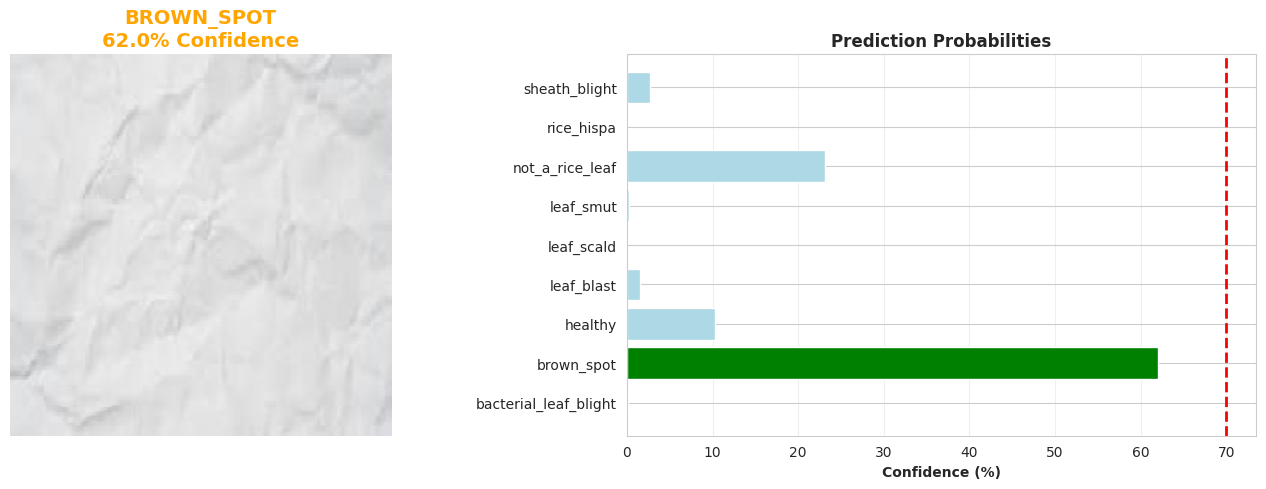


🧪 TEST 2: Rice Leaf Sample

PREDICTION RESULT
🦠 DISEASE DETECTED: BROWN_SPOT
Confidence: 99.99%

Top 5 Predictions:
  1. brown_spot.........................  99.99% ███████████████████
  2. not_a_rice_leaf....................   0.01% 
  3. leaf_blast.........................   0.00% 
  4. healthy............................   0.00% 
  5. leaf_scald.........................   0.00% 


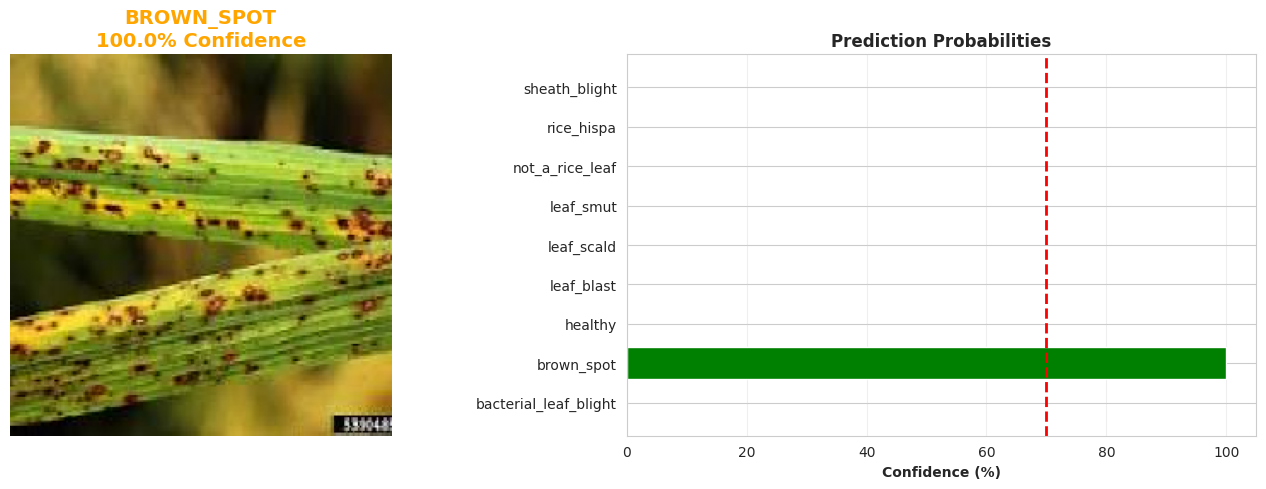


🧪 TEST: Healthy Leaf - healthy_000713.jpg

PREDICTION RESULT
✅ HEALTHY RICE LEAF
Confidence: 100.00%

Top 5 Predictions:
  1. healthy............................ 100.00% ████████████████████
  2. bacterial_leaf_blight..............   0.00% 
  3. leaf_smut..........................   0.00% 
  4. brown_spot.........................   0.00% 
  5. not_a_rice_leaf....................   0.00% 


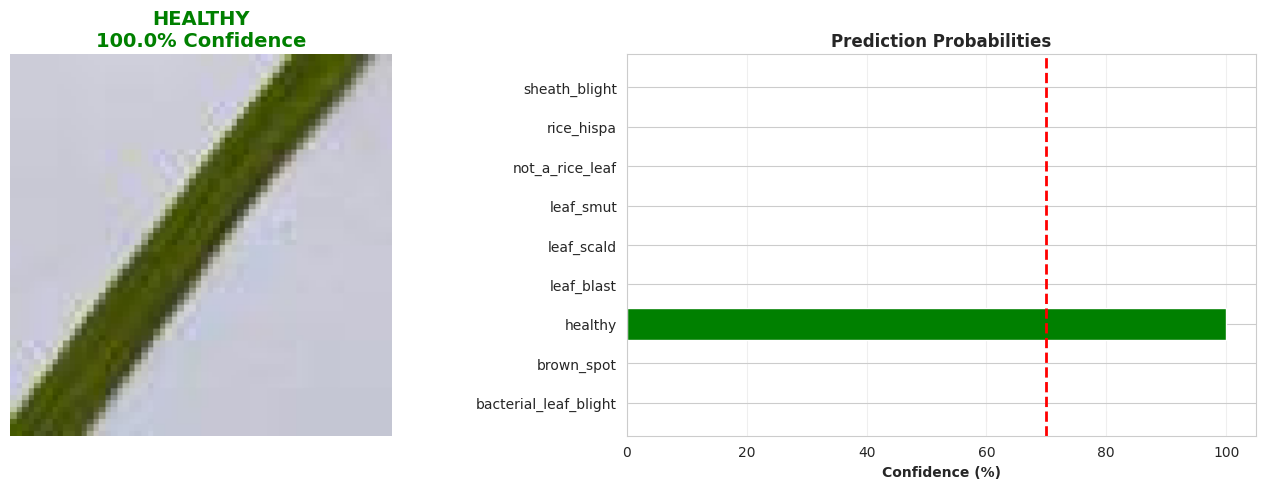


🧪 TEST: Healthy Leaf - healthy_000457.jpg

PREDICTION RESULT
✅ HEALTHY RICE LEAF
Confidence: 100.00%

Top 5 Predictions:
  1. healthy............................ 100.00% ████████████████████
  2. bacterial_leaf_blight..............   0.00% 
  3. brown_spot.........................   0.00% 
  4. leaf_smut..........................   0.00% 
  5. not_a_rice_leaf....................   0.00% 


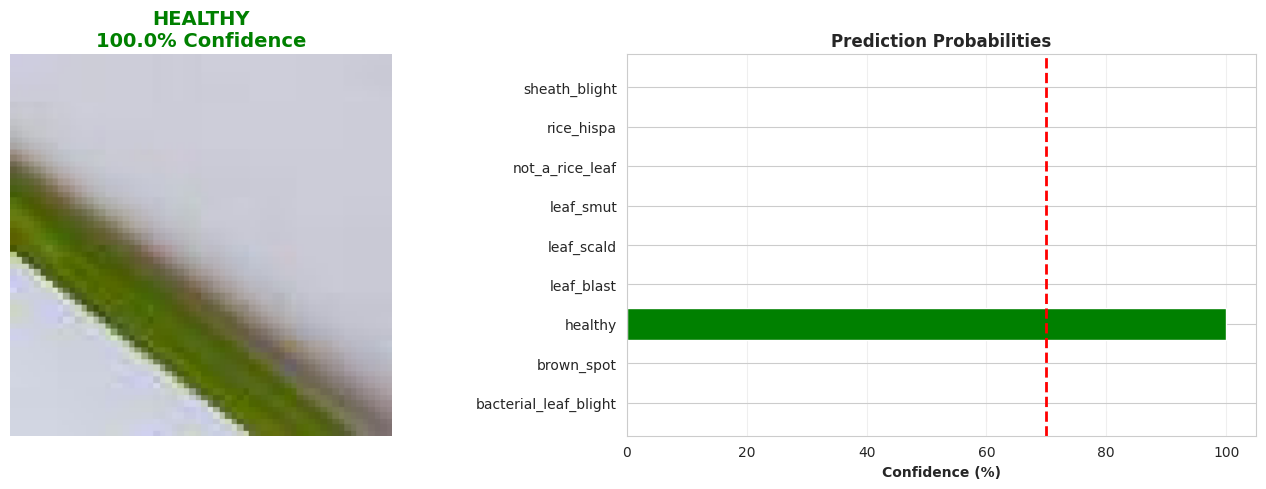


🧪 TEST: Diseased Leaf - bacterial_leaf_blight_000144.JPG

PREDICTION RESULT
🦠 DISEASE DETECTED: BACTERIAL_LEAF_BLIGHT
Confidence: 100.00%

Top 5 Predictions:
  1. bacterial_leaf_blight.............. 100.00% ████████████████████
  2. brown_spot.........................   0.00% 
  3. leaf_smut..........................   0.00% 
  4. healthy............................   0.00% 
  5. not_a_rice_leaf....................   0.00% 


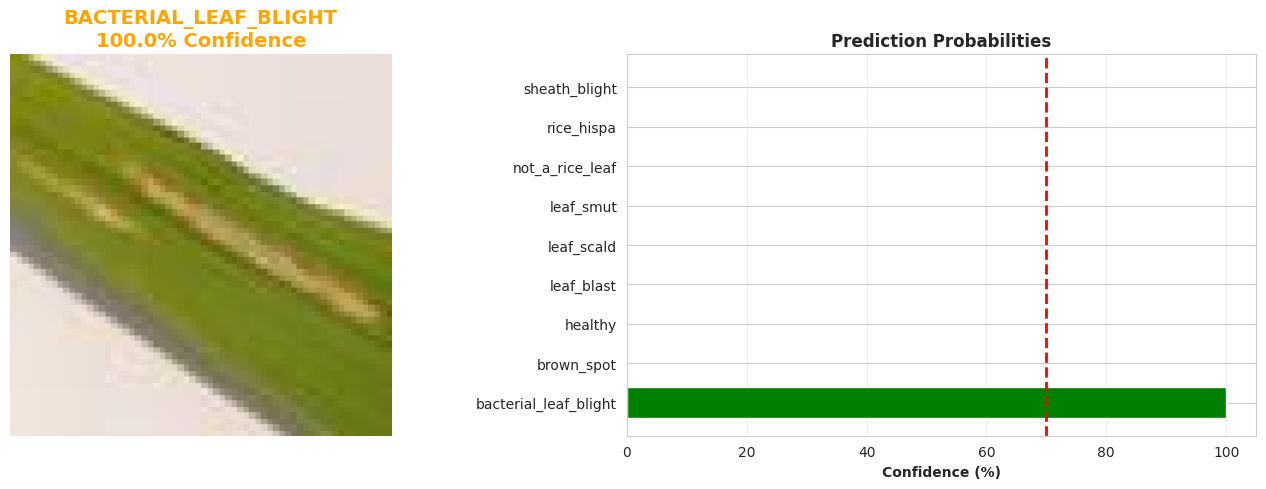


🧪 TEST: Diseased Leaf - bacterial_leaf_blight_000738.jpg

PREDICTION RESULT
🦠 DISEASE DETECTED: BACTERIAL_LEAF_BLIGHT
Confidence: 100.00%

Top 5 Predictions:
  1. bacterial_leaf_blight.............. 100.00% ████████████████████
  2. brown_spot.........................   0.00% 
  3. leaf_smut..........................   0.00% 
  4. not_a_rice_leaf....................   0.00% 
  5. healthy............................   0.00% 


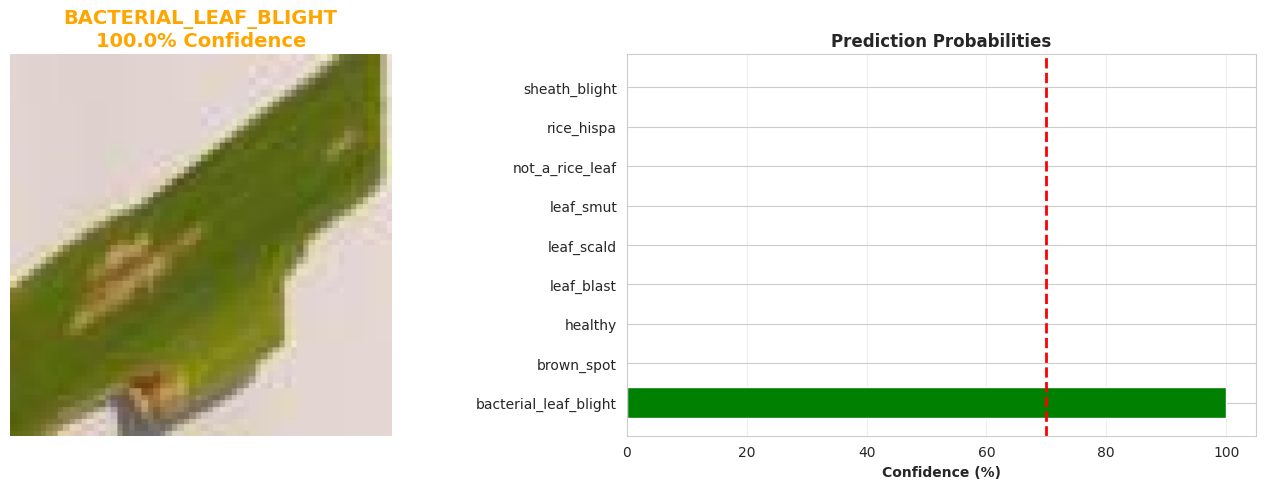

In [26]:
print("=" * 80)
print("TESTING MODEL")
print("=" * 80)

# Test 1: Paper image (should detect as NOT a rice leaf)
print("\n🧪 TEST 1: Paper Image")
predict_rice_disease('/kaggle/input/paper-img/paper.jfif')

# Test 2: Sample rice leaf
print("\n🧪 TEST 2: Rice Leaf Sample")
predict_rice_disease('/kaggle/input/leaf2-leaf/leaf2.jfif')

# Test 3: From your dataset - healthy leaf
import random
from pathlib import Path

healthy_dir = Path("/kaggle/working/clean_rice_dataset/healthy")
if healthy_dir.exists():
    healthy_images = list(healthy_dir.glob("*"))[:5]
    for img in healthy_images[:2]:  # Test 2 random healthy images
        print(f"\n🧪 TEST: Healthy Leaf - {img.name}")
        predict_rice_disease(str(img))

# Test 4: From your dataset - diseased leaf
diseased_dir = Path("/kaggle/working/clean_rice_dataset/bacterial_leaf_blight")
if diseased_dir.exists():
    diseased_images = list(diseased_dir.glob("*"))[:5]
    for img in diseased_images[:2]:  # Test 2 diseased images
        print(f"\n🧪 TEST: Diseased Leaf - {img.name}")
        predict_rice_disease(str(img))

In [ ]:
Current Working Directory: /kaggle/working

Available folders in /kaggle/input:
['paper-img', 'rice-leaf-dataset-01', 'leaf2-leaf', 'rice-disease-datset-02', 'rice-disease-dataset-original', 'rice-leaf-disease-dataset-03']

📁 Files inside: paper-img
/kaggle/input/paper-img/paper.jfif

📁 Files inside: rice-leaf-dataset-01
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease

📁 Files inside: leaf2-leaf
/kaggle/input/leaf2-leaf/leaf2.jfif

📁 Files inside: rice-disease-datset-02
/kaggle/input/rice-disease-datset-02/rice_leaf_diseases

📁 Files inside: rice-disease-dataset-original
/kaggle/input/rice-disease-dataset-original/Original

📁 Files inside: rice-leaf-disease-dataset-03
/kaggle/input/rice-leaf-disease-dataset-03/Rice_Leaf_AUG
/kaggle/input/rice-leaf-disease-dataset-03/Rice_Leaf_Diease

/kaggle/input/paper-img/paper.jfif
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_141150.jpg_2116649d-8872-40df-b6cb-9e13febc750d.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_141408.jpg_849f1e29-6307-4658-b00e-482b8854301e.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_140928.jpg_ff429fce-c81c-4e41-a7f8-fe3d3258c04a.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_140224.jpg_795abe4a-f2fb-4552-88e8-e342e8502f58.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_114405.jpg_c92190eb-4ff7-4a22-a0b7-1a33fd7946dc.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_134816.jpg_a0ec2ee8-4c2a-4407-a99b-fd46b8295d5b.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_112046.jpg_ed3e9383-5ac4-4d4e-9e81-c6db7b1c17e2.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_131600.jpg_2c771fb9-5938-43c4-b4e1-1c71da87872a.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_141341.jpg_7e097357-7bc7-4120-8a51-8a7af7c35d36.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_123646.jpg_fc2dc5d0-991a-4988-bd82-0c4f5984c8a1.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_124221.jpg_2605df01-ccec-42d3-83ee-ffe5cb2d7d83.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_124227.jpg_c2d82bca-3c12-4d5d-841e-a2ddbec86c68.jpg
/kaggle/input/rice-leaf-dataset-01/rice-leaf-desease/Health/Health_original_IMG_20190419_141150.jpg_36deb9b6-67c9-46c9-a0c5-369d861a8475.jpg



    /kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others5.jpg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others576.png
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others160.jpg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others68.jpeg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others585.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others222.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others135.jpg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others10.jpg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others204.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others592.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others650.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others639.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others149.jpeg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others56.jpg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others212.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others643.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others632.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others608.jfif
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others28.jpg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others147.jpeg
/kaggle/input/non-rice-leaf-images/non_rice_leaf_images/others125.jpg